
# The Spark Foundation 


## Task 2 : K- Means Clustering

### By: Eka Agustina

Predict the optimum number of clusters and represent it visually

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
# drop colom id
data.drop(columns='Id', axis=1, inplace=True)

In [5]:
# display the average of numerical variable
data.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


### Find the optimum number of clusters

In [22]:
x = data.iloc[:, [0, 1, 2, 3]].values

In [28]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(x)
    
    wcss.append(km.inertia_)

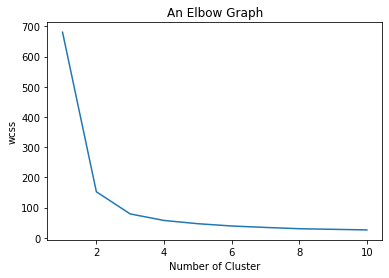

In [32]:
#plot an elbow graph
plt.plot(range(1,11), wcss)
plt.title('An Elbow Graph')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show()

Optimum number of cluster -> 3

In [36]:
K = 3
km = KMeans(n_clusters=K, init='k-means++', random_state=0)

#return label for each datapoint base on their clusters
y = km.fit_predict(x)

print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


### Plot all the clusters

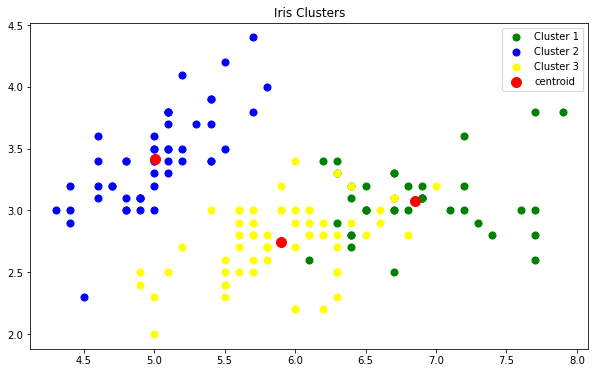

In [43]:
plt.figure(figsize=(10,6))

plt.scatter(x[y==0,0],x[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[y==1,0],x[y==1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(x[y==2,0],x[y==2,1], s=50, c='yellow', label='Cluster 3')

#centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=100, c='red', label='centroid')
plt.title('Iris Clusters')
plt.xlabel('')
plt.legend()
plt.show()